<a href="https://colab.research.google.com/github/AlexNoonan-Syracuse/lab3/blob/main/BigDataLab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fuzzymatcher

In [180]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
from pandas.io.html import read_html
import numpy as np
import fuzzymatcher

# Obtain data and understand elements
csvURL = "https://raw.githubusercontent.com/2SUBDA/IST_718/master/Coaches9.csv"

coaches = pd.read_csv(csvURL)
#print(coaches.isna().sum())

#print(coaches.head())

coaches['Conference'] = coaches['Conference'].str.replace('Ind.', 'Independent')
coaches['Conference'] = coaches['Conference'].str.replace('Mt. West', 'Mountain West')
# cleaning and changing dtype of numeric columns
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace(',', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('$', '')
coaches['SchoolPay'] = coaches['SchoolPay'].str.replace('--', '')
coaches['SchoolPay'] = pd.to_numeric(coaches['SchoolPay'])

coaches['TotalPay'] = coaches['TotalPay'].str.replace(',', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('$', '')
coaches['TotalPay'] = coaches['TotalPay'].str.replace('--', '')
coaches['TotalPay'] = pd.to_numeric(coaches['TotalPay'])

coaches['Bonus'] = coaches['Bonus'].str.replace(',', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('$', '')
coaches['Bonus'] = coaches['Bonus'].str.replace('--', '')
coaches['Bonus'] = pd.to_numeric(coaches['Bonus'])
coaches['Bonus'] = coaches['Bonus'].fillna(0)

coaches['BonusPaid'] = coaches['BonusPaid'].str.replace(',', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('$', '')
coaches['BonusPaid'] = coaches['BonusPaid'].str.replace('--', '')
coaches['BonusPaid'] = pd.to_numeric(coaches['BonusPaid'])
coaches['BonusPaid'] = coaches['BonusPaid'].fillna(0)

coaches['AssistantPay'] = coaches['AssistantPay'].str.replace(',', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('$', '')
coaches['AssistantPay'] = coaches['AssistantPay'].str.replace('--', '')
coaches['AssistantPay'] = pd.to_numeric(coaches['AssistantPay'])

coaches['Buyout'] = coaches['Buyout'].str.replace(',', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('$', '')
coaches['Buyout'] = coaches['Buyout'].str.replace('--', '')
coaches['Buyout'] = pd.to_numeric(coaches['Buyout'])
coaches['Buyout'] = coaches['Buyout'].fillna(0)

print(coaches.head())

                  School     Conference  ... AssistantPay      Buyout
0              Air Force  Mountain West  ...            0         0.0
1                  Akron            MAC  ...            0    688500.0
2                Alabama            SEC  ...            0  33600000.0
3  Alabama at Birmingham          C-USA  ...            0   3847500.0
4      Appalachian State       Sun Belt  ...            0   2160417.0

[5 rows x 9 columns]


In [ ]:
# pulling in other data sources

#stadium capacity

page = 'https://www.collegegridirons.com/comparisons-by-capacity/'
table1 = read_html(page, index_col=0, attrs={"class":"tableizer-table"})
df1 = pd.DataFrame(table1[0])

df1.dtypes

In [60]:
#win rates 
table2 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742')
#wikitables = read_html(page, index_col=0, infer_types=False, attrs={"class":"wikitable"})
table2 = pd.DataFrame(table2[0])

table3 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742/p2')
table3 = pd.DataFrame(table3[0])
table4 = read_html('https://www.ncaa.com/stats/football/fbs/current/team/742/p3')
table4 = pd.DataFrame(table4[0])
table2 = table2.append(table3)
df2 = table2.append(table4)
df2['Team'] = df2['Team'].str.replace('App State', 'Appalachian State')
df2['Team'] = df2['Team'].str.replace('Arizona', 'Arizona State')
df2['Team'] = df2['Team'].str.replace('Florida', 'Florida State')
df2['Team'] = df2['Team'].str.replace('Colorado', 'Colorado State')
df2['Team'] = df2['Team'].str.replace('Iowa', 'Iowa State')
df2['Team'] = df2['Team'].str.replace('Boise St.', 'Boise State')
df2['Team'] = df2['Team'].str.replace('Army West Point', 'Army')
#table2.head()
#df2.columns

In [158]:
# grad data 
df3 = pd.read_csv("https://raw.githubusercontent.com/AlexNoonan-Syracuse/lab3/main/26801-0001-Data.tsv", sep="\t")

# normalizing conference names to join to other dataframes
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Conference USA', 'C-USA')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('American Athletic Conference', 'AAC')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Southeastern Conference', 'SEC')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Pac-12 Conference', 'Pac-12')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Sun Belt Conference', 'Sun Belt')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Mid-American Conference', 'MAC')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Mountain West Conference','Mountain West')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Atlantic Coast Conference','ACC')
df3['CONFNAME_14'] = df3['CONFNAME_14'].str.replace('Big Ten Conference','Big Ten')
df3['SCL_NAME'] = df3['SCL_NAME'].str.replace('Georgia Institute of Technology','Georgia Tech')
df3['SCL_NAME'] = df3['SCL_NAME'].str.replace('University at Buffalo, the State University of New York','Buffalo')
df3['SCL_NAME'] = df3['SCL_NAME'].str.replace('Rutgers, The State University of New Jersey, New Brunswick','Rutgers')

# remapping categorical values
df3['SCL_PRIVATE'] = df3['SCL_PRIVATE'].astype(str)
#df3['SCL_PRIVATE'] = df3.replace({'SCL_PRIVATE': {'1' : 'Private', '0' : 'Public' }})

df3['SCL_DIV_14'] = df3['SCL_DIV_14'].astype(str)
#df3['SCL_DIV_14'] = df3.replace({'SCL_DIV_14': {'1' : 'Division1', '2' : 'Division2' , '3' : 'Division3' }})




# subsetting for football code == 4 
df3 = df3[df3['SPORT_CODE'] == 4]
# reducing number of columns for specific factors
df3 = df3[["CONFNAME_14","SCL_DIV_14", "SCL_NAME",  "SCL_PRIVATE", "MULTIYR_RET_RATE", "MULTIYR_ELIG_RATE",
           "MULTIYR_SQUAD_SIZE", "PUB_AWARD_14"]]

df3.head()

,CONFNAME_14,SCL_DIV_14,SCL_NAME,SCL_PRIVATE,MULTIYR_RET_RATE,MULTIYR_ELIG_RATE,MULTIYR_SQUAD_SIZE,PUB_AWARD_14
2,Southwestern Athletic Conf.,1,Alabama A&M University,0,0.961279,0.886097,321,0
35,Southwestern Athletic Conf.,1,Alabama State University,0,0.892996,0.852713,287,0
67,SEC,1,University of Alabama,0,0.965361,0.978006,392,0
83,SEC,1,Auburn University,0,0.960998,0.966616,368,0
92,Ohio Valley Conference,1,Jacksonville State University,0,0.932231,0.924837,339,0


In [ ]:
table6 = read_html("https://sports.usatoday.com/ncaa/finances")
df4 = pd.DataFrame(table6[0])
df4.dtypes

In [159]:
# unique school names for each df 
# coaches, df1, df2, df3, df4
coachesSchoolNames = list(coaches['School'].unique())
df1_SchoolNames = list(df1['College'].unique())
df2_SchoolNames = list(df2['Team'].unique())
df3_SchoolNames = list(df3['SCL_NAME'].unique())
df4_SchoolNames = list(df4['School'].unique())

#main list
#print(coachesSchoolNames)
#print(df1_SchoolNames)

#print(df2_SchoolNames)

#print(df3_SchoolNames)

#print(df4_SchoolNames)

# unique Conference for each df
coachesConfNames = list(coaches['Conference'].unique())
df1_ConfNames = list(df1['Conference'].unique())
# no conference in df2 df2_ConfNames = list(df2['Team'].unique())
df3_ConfNames = list(df3['CONFNAME_14'].unique())
df4_ConfNames = list(df4['Conf'].unique())
#print(coachesConfNames)
#print(df1_ConfNames)
#print(df3_ConfNames)
#print(df4_ConfNames)

In [181]:
# joining coaches to df1
# maybe do some name normalizing instead 

left_on1 = ["School", "Conference"]
right_on1 = ["College", "Conference"]

dfJoined = fuzzymatcher.fuzzy_left_join(coaches,df1, left_on1, right_on1)
dfJoined.sort_values(by='best_match_score', ascending = False)

# removing bad joins and "resetting dataframe"
dfJoined = dfJoined[dfJoined['best_match_score'] > 0.1 ]
dfJoined = dfJoined.drop(columns=['best_match_score', '__id_left', '__id_right', 'College','Conference_right'])
dfJoined = dfJoined.rename(columns={"Conference_left": "Conference"})

# joining df2
left_on2 = ["School"]
right_on2 = ["Team"]
dfJoined = fuzzymatcher.fuzzy_left_join(dfJoined,df2, left_on2, right_on2)
dfJoined = dfJoined[dfJoined['best_match_score'] > 0.05 ]
dfJoined = dfJoined.drop(columns=['best_match_score', '__id_left', '__id_right', 'Team'])

# join main df to df3
right_on3 = ["SCL_NAME", "CONFNAME_14"]

dfJoined = fuzzymatcher.fuzzy_left_join(dfJoined, df3, left_on1, right_on3)
dfJoined = dfJoined[dfJoined['best_match_score'] > 0.1 ]
dfJoined = dfJoined.drop(columns=['best_match_score', '__id_left', '__id_right', 'SCL_NAME', 'CONFNAME_14'])

# join main df to df4

right_on4 = ["School", "Conf"]
dfJoined = fuzzymatcher.fuzzy_left_join(dfJoined, df4, left_on1, right_on4)
dfJoined = dfJoined[dfJoined['best_match_score'] > 0.15 ]
dfJoined = dfJoined.drop(columns=['best_match_score', '__id_left', '__id_right', 'School_right', 'Conf'])

dfJoined.reset_index(inplace=True)
dfJoined = dfJoined.drop(columns=['index'])
dfJoined = dfJoined.rename(columns={"School_left": "School"})

# ranked schools boolean column
dfJoined['Rank'].fillna(0, inplace=True)
dfJoined['Ranked'] = dfJoined['Rank'] > 0
dfJoined['logpct'] = np.log(dfJoined['Pct'])
dfJoined.head()


/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,School,Conference,Coach,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Capacity,Opened,Rank,W,L,T,Pct,SCL_DIV_14,SCL_PRIVATE,MULTIYR_RET_RATE,MULTIYR_ELIG_RATE,MULTIYR_SQUAD_SIZE,PUB_AWARD_14,Rk,Total Revenue,Total Expenses,Total Allocated,% Allocated,Ranked,logpct
0,Air Force,Mountain West,Troy Calhoun,885000.0,885000.0,247000.0,0.0,0,0.0,52237,1962,58.0,3.0,3.0,0.0,0.500,1,0,0.978328,0.981481,329.0,0.0,57,"$60,009,782","$54,192,115","$40,851,962",68.08,True,-0.693147
1,Akron,MAC,Terry Bowden,411000.0,412500.0,225000.0,50000.0,0,688500.0,30000,2009,113.0,1.0,5.0,0.0,0.167,1,0,0.952681,0.934579,360.0,0.0,84,"$37,194,485","$37,275,978","$26,011,378",69.93,True,-1.789761
2,Alabama,SEC,Nick Saban,8307000.0,8307000.0,1100000.0,500000.0,0,33600000.0,101821,1929,1.0,13.0,0.0,0.0,1.000,1,0,0.965361,0.978006,392.0,0.0,7,"$164,090,889","$185,317,681","$2,654,551",1.62,True,0.000000
3,Appalachian State,Sun Belt,Scott Satterfield,712500.0,712500.0,295000.0,145000.0,0,2160417.0,24150,1962,19.0,9.0,3.0,0.0,0.750,1,0,0.953008,0.955390,301.0,0.0,81,"$37,996,512","$37,773,447","$22,026,921",57.97,True,-0.287682
4,Arizona,Pac-12,Kevin Sumlin,1600000.0,2000000.0,2025000.0,0.0,0,10000000.0,56037,1928,119.0,0.0,5.0,0.0,0.000,1,0,0.947284,0.949922,362.0,0.0,38,"$105,091,389","$100,565,835","$21,886,167",20.83,True,-inf


In [182]:
print(len(dfJoined))
# cleaning main dataframe


dfJoined['Total Revenue'] = dfJoined['Total Revenue'].str.replace(',', '')
dfJoined['Total Revenue'] = dfJoined['Total Revenue'].str.replace('$', '')
dfJoined['Total Revenue'] = pd.to_numeric(dfJoined['Total Revenue'], downcast='float')

dfJoined['Total Expenses'] = dfJoined['Total Expenses'].str.replace(',', '')
dfJoined['Total Expenses'] = dfJoined['Total Expenses'].str.replace('$', '')
dfJoined['Total Expenses'] = pd.to_numeric(dfJoined['Total Expenses'], downcast='float')


dfJoined['Total Allocated'] = dfJoined['Total Allocated'].str.replace(',', '')
dfJoined['Total Allocated'] = dfJoined['Total Allocated'].str.replace('$', '')
dfJoined['Total Allocated'] = pd.to_numeric(dfJoined['Total Allocated'], downcast='float')

dfJoined['% Allocated'] = pd.to_numeric(dfJoined['% Allocated'])
dfJoined['% Allocated'] = dfJoined['% Allocated']/100

print(dfJoined.dtypes)
print(dfJoined.isna().sum())
dfJoined.describe()



90
School                 object
Conference             object
Coach                  object
SchoolPay             float64
TotalPay              float64
Bonus                 float64
BonusPaid             float64
AssistantPay            int64
Buyout                float64
Capacity                int64
Opened                  int64
Rank                  float64
W                     float64
L                     float64
T                     float64
Pct                   float64
SCL_DIV_14             object
SCL_PRIVATE            object
MULTIYR_RET_RATE      float64
MULTIYR_ELIG_RATE     float64
MULTIYR_SQUAD_SIZE    float64
PUB_AWARD_14          float64
Rk                     object
Total Revenue         float32
Total Expenses        float32
Total Allocated       float32
% Allocated           float64
Ranked                   bool
logpct                float64
dtype: object
School                0
Conference            0
Coach                 0
SchoolPay             0
TotalPay         

,SchoolPay,TotalPay,Bonus,BonusPaid,AssistantPay,Buyout,Capacity,Opened,Rank,W,L,T,Pct,MULTIYR_RET_RATE,MULTIYR_ELIG_RATE,MULTIYR_SQUAD_SIZE,PUB_AWARD_14,Total Revenue,Total Expenses,Total Allocated,% Allocated,logpct
count,9.000000e+01,9.000000e+01,9.000000e+01,9.000000e+01,90.0,9.000000e+01,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0,90.0,90.000000,90.000000
mean,2.582482e+06,2.591188e+06,8.807278e+05,1.360130e+05,0.0,8.863048e+06,52164.711111,1953.422222,16.566667,4.500000,3.722222,0.0,0.533444,0.953953,0.954842,357.533333,0.100000,87352880.0,85559936.0,13375838.0,0.291896,-inf
std,2.027695e+06,2.033265e+06,6.777734e+05,2.395845e+05,0.0,1.107918e+07,22871.588358,28.316818,32.547304,2.740663,2.135983,0.0,0.244050,0.013327,0.021254,20.577177,0.301681,51703332.0,49072856.0,11303819.0,0.282233,NaN
min,3.900000e+05,3.900000e+05,0.000000e+00,0.000000e+00,0.0,0.000000e+00,22113.000000,1904.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.913600,0.886667,254.000000,0.000000,15568952.0,16927856.0,0.0,0.000000,-inf
25%,8.003760e+05,8.037155e+05,3.845000e+05,0.000000e+00,0.0,1.250823e+06,30434.250000,1927.250000,0.000000,2.250000,2.000000,0.0,0.333000,0.944807,0.937357,352.250000,0.000000,37874883.0,37929959.0,2729539.5,0.019450,-1.099613
50%,2.000000e+06,2.000000e+06,7.575000e+05,5.000000e+04,0.0,4.998089e+06,52345.500000,1951.500000,0.000000,4.000000,4.000000,0.0,0.558000,0.954719,0.957042,361.000000,0.000000,87500760.0,92030548.0,13245797.5,0.163100,-0.583668
75%,3.778438e+06,3.778438e+06,1.243750e+06,1.487500e+05,0.0,1.242891e+07,62980.000000,1970.750000,15.750000,6.000000,5.000000,0.0,0.744250,0.963999,0.970920,368.000000,0.000000,126056082.0,119727808.0,21792593.0,0.581275,-0.295469
max,8.307000e+06,8.307000e+06,3.100000e+06,1.350000e+06,0.0,6.812500e+07,107601.000000,2017.000000,119.000000,13.000000,9.000000,0.0,1.000000,0.989280,0.996942,392.000000,1.000000,223879776.0,220572960.0,48372196.0,0.822500,0.000000


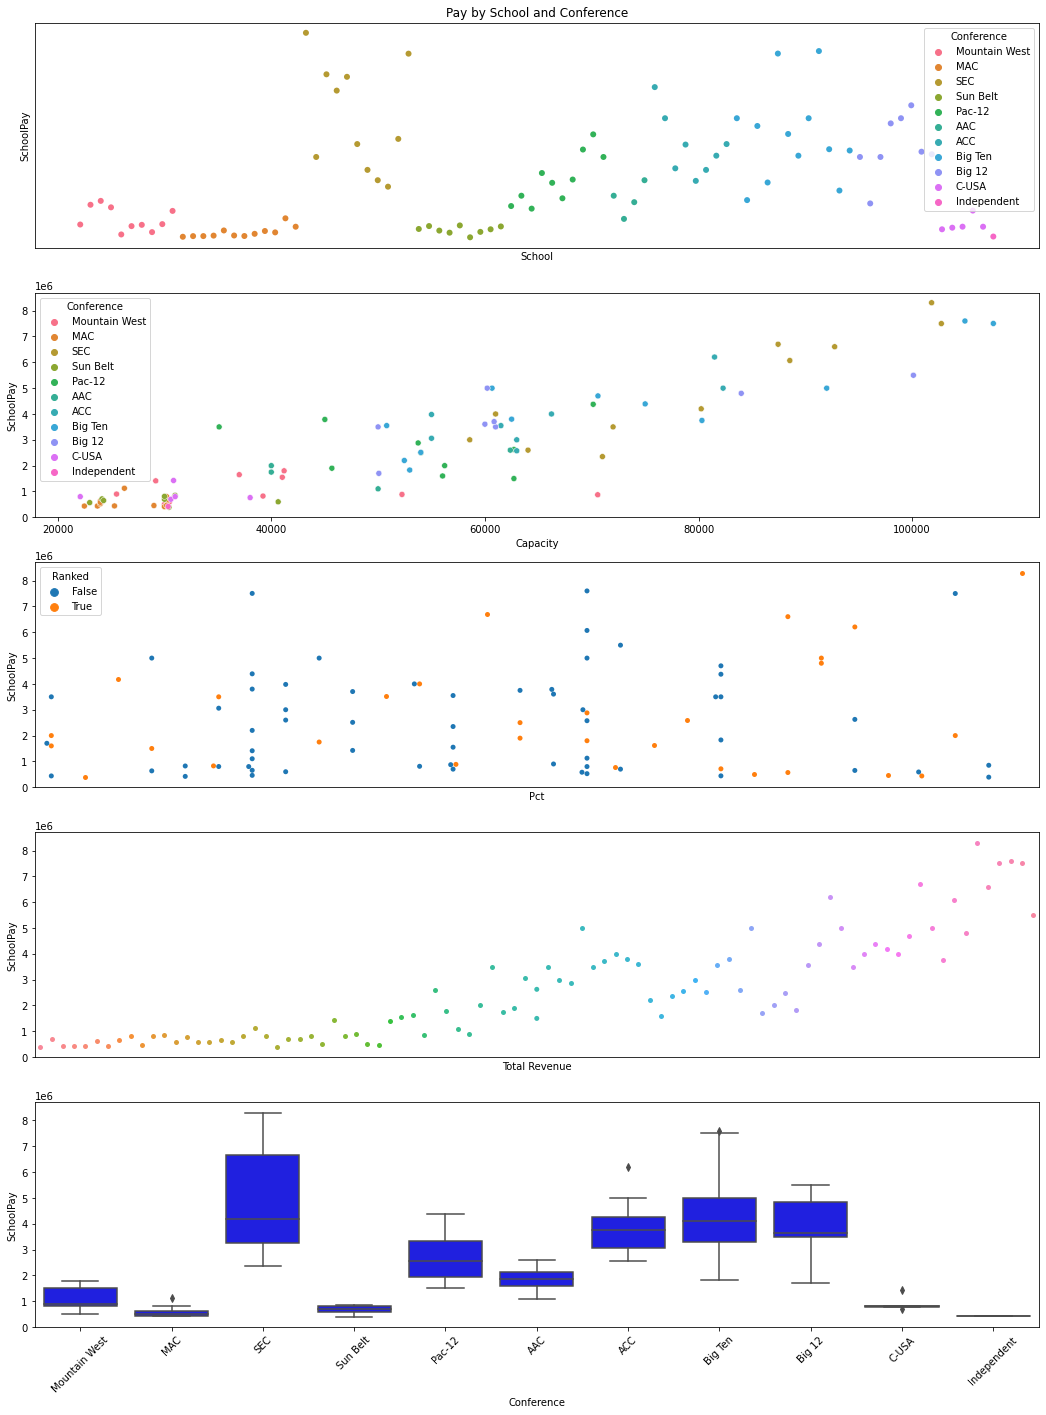

In [190]:
# exploratory data visualizations
from IPython.core.pylabtools import figsize

codes, values = pd.factorize(dfJoined['Conference'].unique())
conferenceIds = pd.DataFrame({"Conference":values, "ConferenceCodes":codes})
dfJoined = pd.merge(left=dfJoined, right=conferenceIds, left_on="Conference", right_on = "Conference")

fig, axs = plt.subplots(5, 1, figsize = (18,24))
g1 = sns.scatterplot(x='School', y='SchoolPay', data=dfJoined, hue='Conference', ec=None, ax=axs[0] )
g1.set(xticklabels=[])
g1.set(title='Pay by School and Conference')
g1.set(xlabel="School")
g1.set(xticks=[])
g1.set(yticks=[])

# violin plot of private vs public schools
#g2 =  sns.violinplot(x='SCL_PRIVATE', y='SchoolPay', data=dfJoined, ec=None, ax=axs[1] )
# not enough private schools

# scatter plot of  stadium capacity vs schoolpay

g2 = sns.scatterplot(data=dfJoined, x="Capacity", y="SchoolPay", hue="Conference", ax= axs[1])


# win rate % by total pay
g3 = sns.swarmplot(data=dfJoined, x="Pct", y="SchoolPay", hue="Ranked", ax=axs[2])
g3.set(xticks=[])


# revenue vs total pay
g4 = sns.swarmplot(data=dfJoined, x="Total Revenue", y="SchoolPay",  ax=axs[3])
g4.set(xticks=[])

# box plots per conference
g5 = sns.boxplot(x="Conference", y="SchoolPay", data=dfJoined, color = "blue", ax=axs[4] )
axs[4].set_xticklabels(dfJoined['Conference'].unique())
axs[4].tick_params(axis="x", labelrotation=45 )

plt.show()





In [ ]:
# linear models 

